In [69]:
import pandas as pd
import datetime

# covid data taken from https://covidtracking.com/data/state/michigan/cases
covid_df=pd.read_excel('data\MI_COVID.xlsx')


covid_df['Date']=pd.to_datetime(covid_df.Date) + datetime.timedelta(days=-14)
covid_df.set_index('Date', inplace=True)

#covid_by_month=covid_df[['New cases', 'MONTH']].groupby('MONTH').sum()
#covid_by_month=covid_by_month[:5]

covid_df.head()


,Cases (confirmed plus probable),New cases,Confirmed cases,Probable Cases
Date,,,,
2020-10-24,229003,6494,207794,21209
2020-10-23,222509,4246,201569,20940
2020-10-22,218263,6103,197806,20457
2020-10-21,212160,4397,192096,20064
2020-10-20,207763,3437,187995,19768


In [70]:
#trips info taken from https://data.bts.gov/Research-and-Statistics/Trips-by-Distance/w96p-f2qv
trips_MI=pd.read_csv('data\Trips_MI.csv')
trips_MI['Date']=pd.to_datetime(trips_MI.Date)
trips_MI.set_index('Date', inplace=True)
trips_MI=trips_MI.iloc[:,2:]
trips_MI.tail()

,Population Staying at Home,Population Not Staying at Home,Number of Trips
Date,,,
2020-10-20,5106072.0,14885758.0,56638341.0
2020-10-21,5077576.0,14914254.0,56798578.0
2020-10-22,4938560.0,15053270.0,57391180.0
2020-10-23,4637878.0,15353952.0,63064830.0
2020-10-24,5081616.0,14910214.0,62122668.0


In [71]:
covid_graf=pd.merge(covid_df,trips_MI,how='inner', left_index=True, right_index=True)
covid_graf.head()

,Cases (confirmed plus probable),New cases,Confirmed cases,Probable Cases,Population Staying at Home,Population Not Staying at Home,Number of Trips
Date,,,,,,,
2020-10-24,229003,6494,207794,21209,5081616.0,14910214.0,62122668.0
2020-10-23,222509,4246,201569,20940,4637878.0,15353952.0,63064830.0
2020-10-22,218263,6103,197806,20457,4938560.0,15053270.0,57391180.0
2020-10-21,212160,4397,192096,20064,5077576.0,14914254.0,56798578.0
2020-10-20,207763,3437,187995,19768,5106072.0,14885758.0,56638341.0


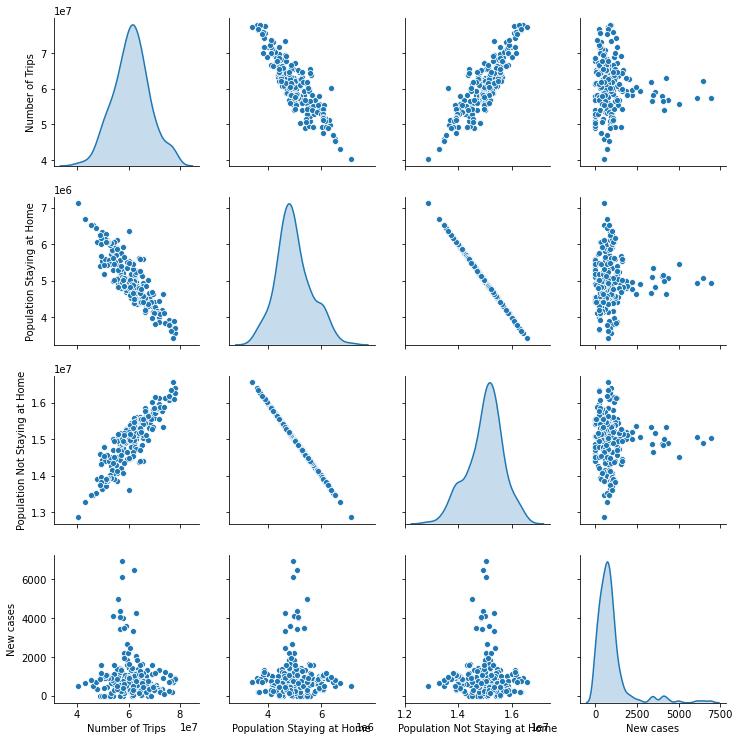

In [72]:
import seaborn as sns
sns.pairplot(covid_graf[['Number of Trips','Population Staying at Home','Population Not Staying at Home','New cases']], diag_kind='kde');

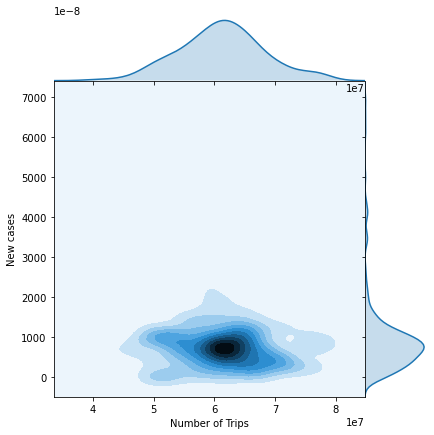

In [73]:
sns.jointplot(covid_graf['Number of Trips'], covid_graf['New cases'], kind='kde', space=0)